**Tutorial 6a - Microlensing event statistics: selection**

In this tutorial, we will look at some gravitational microlensing data.  This is where a star is magnified by the presence of some compact massive object very close to the line of sight to the star.  Each microlensing event is detected by a brightening of a star in the galactic bulge or the LMC.   From the light curve of the star during the event, three things can be measured - the time it occurs, the duration of the event, $\Delta t$, and the Einstein crossing time, $t_E$.  $\Delta t$ is defined as the length of time the star is magnified by greater than 1.34, which is the magnification the source will have when its angular separation from the lens is less than one Einstein radius, $R_E$.

The Einstein radius in angular units is $ R_E = \sqrt{ \frac{4 G m}{c^2} \frac{D_{ls}}{D_l D_s} } = \sqrt{ 2 R_{sh} \frac{D_{ls}}{D_l D_s} }$ where $m$ is the mass of the lens and $R_{sh}$ is the Schwarzschild radius of the lens.  $D_{ls}$ is the radial distance between the lens and the source star, $D_l$ is the distance from us to the lens, and $D_s$ is the distance from us to the source.

The Einstein crossing time is 

$t_E = \frac{2R_E}{v_\perp}$ where $v_\perp$ is the velocity of the lens transverse to our line of sight relative to the source.

In [257]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pa
from math import erf
from scipy.integrate import quad

Under the simplifications that :

* the density of lenses is constant between the observer and sources
* the lenses' velocities are Gaussian distributed with zero mean
* all the lenses have the same mass

the event rate, $\Gamma$, as a function of Einstein times can be found to be

$\frac{d\Gamma}{dt_E} = \frac{\sigma^2 D_s \eta}{4 t_o} \left( \frac{t_o}{t_E} \right)^4 \left[  \pi \left( \left( \frac{t_o}{t_E} \right)^4  + 8\left( \frac{t_o}{t_E} \right)^2 + 3 \right) \exp\left[ - \frac{1}{8}  \left( \frac{t_o}{t_E} \right)^2 \right] {\rm erf}\left(  \left( \frac{t_o}{3t_E} \right)^{3/2} \right) - \frac{ \left( \frac{t_o}{t_E} \right)^2 +12 }{ \left( \frac{t_o}{t_E} \right)^4} \right]$



The charactoristic timescale is $t_o = \frac{2 R_{sh} D_s}{\sigma^2}$ where $\sigma^2$ is the velocity dispession of the lenses.  $\eta$ is the number density of lenses.  We will not be concerned with measuring the normalization here.  We will only seek to recover $t_o$.  Since we can estimate $D_s$ and $\sigma^2$ from other sources, this would be a measure of the lenses' mass.

1) Code up the Einstein time distribution.  The normalization needs to be calculated numerically.  Calculate it by integrating over $t_e$ with quad().  Keep the normalization constant out of the function definition.

In [258]:

norm = 1
def dGammdt(te,to) :
    if te<0.1*to :  # this avoids some numerical problems
        return 0
    t = to/te
    return  ( np.pi*( t**4 + 8*t**2 +3 )*np.exp(-t*t/8)*erf(t/3**1.5) -(t**2 +12 )/t**4 )*t**4/to

tes = np.linspace(0.01,1,100)

norm = 1.0/quad(dGammdt,0,1,args=(1))[0]

dGammdt_v = np.vectorize(dGammdt)

2) Plot the normalized $t_E$ distribution for $t_o=50$ and $t_o=80$ on the same plot with labels.

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00757904 0.02021077
 0.03873731 0.05954959 0.07819643 0.09142967 0.0982869  0.09924931
 0.09551994 0.08866272 0.08012126 0.0709783  0.06195563 0.05341418
 0.04571484 0.03885761 0.0329628  0.02791011 0.02345893 0.01984986
 0.01672201 0.01407536 0.01190992 0.01010538 0.00854146 0.00721813
 0.00613541 0.0052933  0.00445118 0.00384967 0.00324816 0.00276695
 0.00240604 0.00204514 0.00180453 0.00156393 0.00132332 0.00120302
 0.00096242 0.00084212 0.00072181 0.00072181 0.00060151 0.00048121
 0.00048121 0.00036091 0.00036091 0.0002406  0.0002406  0.0002406
 0.0002406  0.0001203  0.0001203  0.0001203  0.0001203  0.0001203
 0.0001203  0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0. 

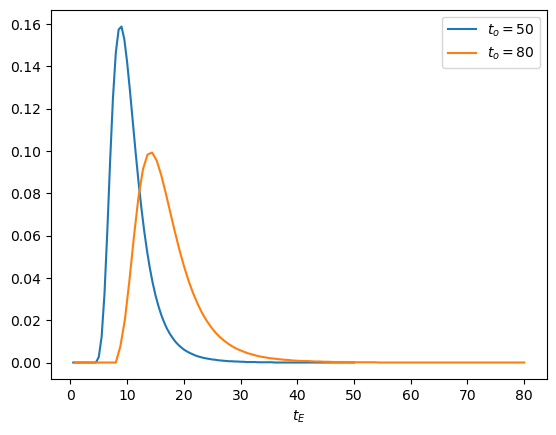

In [259]:
to=50
y = dGammdt_v(tes*to,to)*norm
plt.plot(tes*to,y,label=r'$t_o=50$')

to=80
y = dGammdt_v(tes*to,to)*norm
plt.plot(tes*to,y,label=r'$t_o=80$')
print(y)
plt.legend()
plt.xlabel(r'$t_E$')
plt.show()


3) By integrating your probability distribution, calculate the cumulative distribution function of $t_E$ for $t_o=60$, $F(t_E|t_o)$ and plot it.

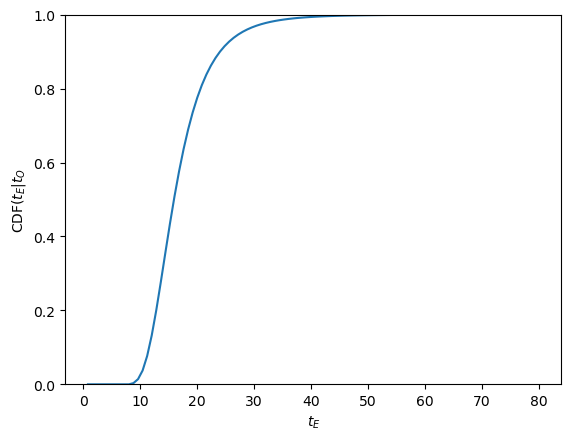

In [260]:
cdf = np.empty_like(tes)
for i,t in enumerate(tes) :
    cdf[i] = quad(dGammdt,0,t*to,args=(to))[0]*norm

plt.plot(tes*to,cdf)
plt.xlabel(r'$t_E$')
plt.ylabel(r'CDF($t_E| t_O$')
plt.ylim(0,1)
plt.show()

4) Calculate approximately what the value of $t_o$ should be for events in the galactic bulge.  Use $D_s=8$ kpc, $\sigma = 200$ km/s and lens mass 1 $M_{sun}$.  To do this, you might find the following modules in astropy useful.

In [279]:

import astropy.constants as const
from astropy import units 

# some examples
print(const.M_sun)
print(const.M_sun/const.c**2)
print(const.M_sun*const.G/const.c**2)
print('10 days in seconds = ',10*units.day.to('s')*units.s)


to = np.sqrt( 4*c.M_sun*c.G/c.c**2 * 8.0e3* units.pc.to('m') / (200e3*units.m/units.s )**2 )/ units.day.to('s')

print(to.value,'days')

  Name   = Solar mass
  Value  = 1.988409870698051e+30
  Uncertainty  = 4.468805426856864e+25
  Unit  = kg
  Reference = IAU 2015 Resolution B 3 + CODATA 2018
22124043540897.547 kg s2 / m2
1476.6250380501249 m
10 days in seconds =  864000.0 s
69.87818846219595 days


5) Read in the data and make a histogram of both the $t_E$'s and the $\Delta t$'s on the same plot.  Make the histograms transparent so you can see the overlapping regions (hint: use the alpha keyword).

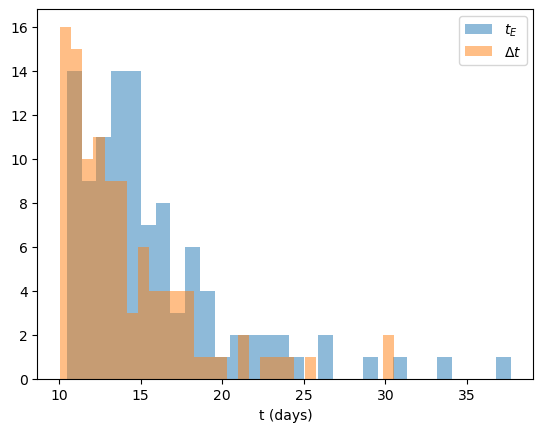

     Unnamed: 0        t_E    t_delta
0             0  14.517222  14.499499
1             1  22.621393  22.394494
2             2  15.736388  13.664784
3             3  14.270970  13.232289
4             4  18.869039  17.925368
..          ...        ...        ...
101         101  12.821377  11.302953
102         102  20.006361  17.111664
103         103  22.972864  19.535989
104         104  13.425851  12.861695
105         105  16.898696  16.017689

[106 rows x 3 columns]


In [262]:
df = pa.read_csv('microlensing_events.csv')
te_ob = df['t_E']
t_ob = df['t_delta']

plt.hist(te_ob,bins=30,label=r'$t_E$',alpha=0.5)
plt.hist(t_ob,bins=30,label=r'$\Delta t$',alpha=0.5)
plt.legend()
plt.xlabel('t (days)')
plt.show()
print(df)

5) Write a negative log-likelihood function for the $t_E$ data.   Use it to plot the likelihood as a function of $t_o$.

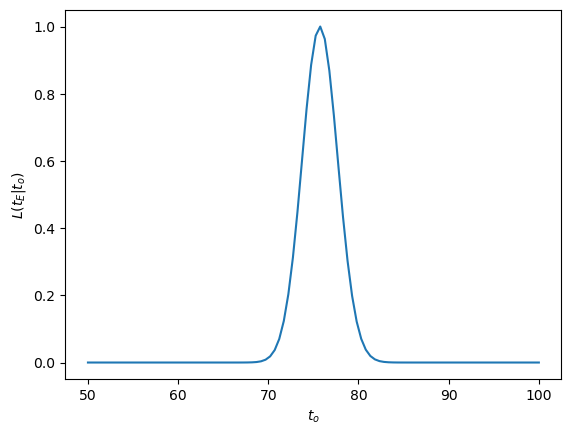

 final_simplex: (array([[75.71829987],
       [75.71836472]]), array([-663.81406228, -663.81406228]))
           fun: -663.8140622780005
       message: 'Optimization terminated successfully.'
          nfev: 38
           nit: 19
        status: 0
       success: True
             x: array([75.71829987])
maximum likelihood t_o =  [75.71829987]


In [263]:


def loglike(to) :
    return -np.sum( np.log( dGammdt_v(te_ob,to) ) )

tos = np.linspace(50,100,100)
ll_noselection = np.empty_like(tos)
for i,t in enumerate(tos) :
    ll_noselection[i] = loglike(t)

plt.plot(tos,np.exp(-ll_noselection+np.min(ll_noselection)))
plt.xlabel(r'$t_o$')
plt.ylabel(r'$L(t_E | t_o)$')
plt.show()


6) Find the maximum likelihood solution for $t_o$ using from scipy.optimize.minimize(). 

In [284]:
from scipy.optimize import minimize 

best = minimize(loglike,85,method='Nelder-Mead')

print(best)

print('maximum likelihood t_o = ',best.x)

 final_simplex: (array([[78.27578354],
       [78.27584839]]), array([-670.68915728, -670.68915728]))
           fun: -670.689157280415
       message: 'Optimization terminated successfully.'
          nfev: 38
           nit: 19
        status: 0
       success: True
             x: array([78.27578354])
maximum likelihood t_o =  [78.27578354]


The Einstein time, $t_E$, is measurable from the shape of the light curve for each event, but it is not the actual length of the microlensing event.  It is the time it would take for the source to travel 2 $R_E$ .  The actual duration of the event is the time the source spends *within* one $R_E$ of the lens.  This diagram might make it clearer.

<img src="einstein_time.png" alt="t_e" class="bg-primary" width="400px">

The two times are equal only if the path of the source passes directly through the lens.

Since the impact parameter is uniformly distributed, the distribution of times is :

$p(\Delta t|t_E) =  \left\{\begin{array}{cc}
\frac{1}{t_E}\frac{\Delta t}{\sqrt{t_E^2 - \Delta t^2}} & \Delta t< t_E \\
0 & \Delta t > t_E
\end{array} \right.
$

7) Write functions that give pdf $p(\Delta t | t_E)$, the cdf $F(\Delta t | t_E)$ and the quantile function $Q(u | t_E)$.  These can all be found analytically.

In [285]:
def pt_te(t,te) :
    if(t>=te or t<0) :
        return 0
    return t/np.sqrt(te*te - t*t)

## cumulative F(t|te)
def cdft_te(t,te) :
    if(t > te) :
        return 1
    return 1 - np.cos( np.arcsin(t/te) )

## quantile function Q(u|te)
def quantile_te(u,te) :
    return np.sin(np.arccos(1-u))*te

8) Find $p(\Delta t|to)$ by integrating over $t_E$ for $t_o=60$.  Remember the product rule!  This must be integrated for each $t_E$.

Plot both $p(t_E|t_o)$ again and $p(\Delta t|to)$ in the same plot.

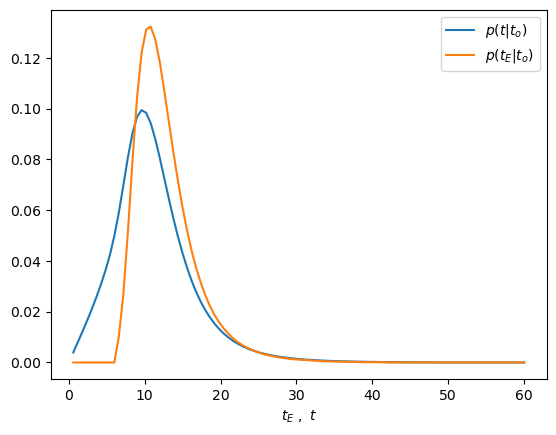

In [265]:
to=60
## make the function p(te,t|to)
def pte(te,t,to) :
    return pt_te(t,te)*dGammdt(te,to)*norm


p = np.empty_like(tes)
for i,t in enumerate(tes) :
    p[i] = quad(pte,0.1*to,to,args=(t*to,to))[0]

norm2 = np.trapz(p,tes*to)
plt.plot(tes*to,p/norm2,label=r'$p(t|t_o)$')
plt.plot(tes*to,dGammdt_v(tes*to,to)*norm,label=r'$p(t_E|t_o)$')

plt.legend()
plt.xlabel(r'$t_E ~, ~t$')
plt.show()



Events that are too long or short cannot be detected because of the observation cadence and the duration of the monitoring campaign.  We will simplify these restrictions by saying that events with $\Delta t < t_{min}$ or  $\Delta t > t_{max}$ are not observable in our data set.

9) Now construct the likelihood that takes into account the *selection*.  The likelihood for one event with the selection function $S(\Delta t)$ is:

$ L(t,t_E | t_o) = \frac{p(t|t_E,t_o)p(t_E|t_o)}{\int_0^\infty dt_E p(t_E|to) \int_0^\infty dt p(t|t_E) S(t) } 
= \frac{p(t|t_E)p(t_E|t_o)}{\int_0^\infty dt_E p(t_E|to) \left[  F(t_{max}|t_E) - F(t_{min}|t_E) \right]} $

$t$ here is $\Delta t$.

In [266]:
def pte(te,to,tmin,tmax) :
    return dGammdt(te,to)*( cdft_te(tmax,te) - cdft_te(tmin,te) )

def lnL(to,tmin,tmax) :
    output = 0
    for i,te in enumerate(te_ob) :
        norm = quad(pte,0,to,args=(to,tmin,tmax))[0]
        output += np.log( pt_te(t_ob[i],te) * dGammdt(te,to) / norm )
    return output
    


10) Using $t_{min} = 10$ days and $t_{max} = 60$ days, loop through tos to make a vector of the likelihood as a function of $t_o$.  This may take a while to run.

In [267]:
tmin=10
tmax=60
ll = np.empty_like(tos)
for i,to in enumerate(tos) :
    ll[i] = lnL(to,tmin,tmax)

11) Make a plot of the posterior found before using only $t_E$'s and no selection, and the posterior with selection taken into account.  Normalize these using scipy.integrate.trapz()

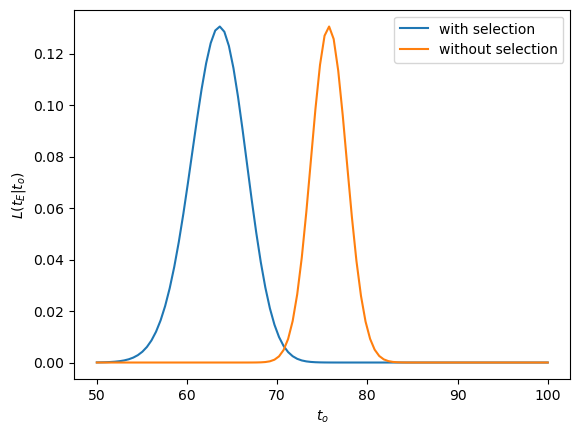

In [268]:
from scipy.integrate import trapz

p = np.exp(ll-np.max(ll))
norm2 = trapz(p,tos)

plt.plot(tos,p/norm2,label='with selection')

pp = np.exp(-ll_noselection+np.min(ll_noselection))
norm22 = trapz(p,tos)

plt.plot(tos,pp/norm22,label='without selection')
plt.legend()
plt.xlabel(r'$t_o$')
plt.ylabel(r'$L(t_E | t_o)$')
plt.show()

12)  Find the maximum likelihood value for $t_o$ with the selection effects.  Find this by finding the location of the maximum in the plot you just made.

In [269]:
print("ML to = ",tos[np.argmax(ll)])

    

ML to =  63.63636363636364
<to> =  63.391158927245925  +/-  3.074352226041789


13) Find the mean and variance of the posterior using numerical integration of the table already created  ( use scipy.integrate.trapz() ).

In [ ]:
p = np.exp(ll-np.max(ll))
aveto = trapz(tos*p,tos)/norm2 
print('<to> = ', aveto ,' +/- ', np.sqrt( trapz(tos**2 *p,tos)/norm2 - aveto**2) )

14) Calculate the mass of the lenses for the maximum likelihood solution for $t_o$ taking $D_s=8$ kpc, $\sigma = 200$ km/s.

In [283]:
to = 63
to*to*(units.day.to('s')*units.s)**2*units.M_sun/( 4*(c.M_sun)*c.G/c.c**2 * 8.0e3* units.pc.to('m') * units.m / (200e3*units.m/units.s )**2 )

<Quantity 0.81282644 solMass>

The actual case is a bit more complicated.  This is a calculation of the OGLE microlensing survey's true selection function as function of $t_E$ and the the closest approach in units of $R_E$ (Peel & Dennison, 2006).

<img src="OGLE-detection-efficiency.png" alt="t_e" class="bg-primary" width="400px">

 This is calculated by creating fake events and seeing what fraction of them are detected.

In [271]:

to=65
tmin=10
tmax=60

u = np.random.uniform(0,1,200)
te_ob = np.interp(u,cdf,tes*to)

u = np.random.uniform(0,1,len(te_ob))
t_ob = te_ob*quantileF(u)

select = t_ob > tmin
te_ob = te_ob[select]
t_ob = t_ob[select]

select = t_ob < tmax
te_ob = te_ob[select]
t_ob = t_ob[select]

print(t_ob)

df = pa.DataFrame({'t_E':te_ob,'t_delta':t_ob})
##df.to_csv('microlensing_events.csv')

[10.91544385 11.75623937 12.58644797 17.19372193 22.65462011 19.56438013
 16.73291342 20.52435081 10.34944016 13.88599915 15.55741913 14.60245905
 24.14993996 15.7425196  17.37590999 14.26335603 18.47161403 23.3434397
 15.39259031 12.38893049 18.06783336 13.67884251 21.26712746 14.02189401
 11.32635042 21.05866928 11.24926847 12.93816056 14.15814839 19.55283721
 10.95670641 13.4844629  15.11679646 14.74949908 15.45234306 19.77186794
 10.88558967 14.61342246 11.7439015  15.17616222 14.8480409  13.14264859
 15.37836939 10.47262808 10.60247764 17.24637227 14.34405286 12.35719323
 13.03474159 12.63555262 16.44324007 17.63764532 11.08480719 12.92427637
 12.49744501 15.7180395  13.64833878 10.74781367 10.13845548 11.37483774
 12.33112558 13.81480294 13.01665876 23.11685601 20.20195819 10.35096992
 10.32933194 22.96606619 15.58601859 14.42916234 10.28275535 29.57150094
 12.08937168 13.13487565 11.97444264 12.17509487 10.59776894 11.71863315
 12.51913202 15.07935961 18.36494693 14.59638438 12.